In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

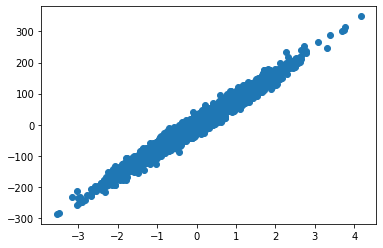

In [8]:
dfx=pd.read_csv('Linear_X_Train.csv')
dfy=pd.read_csv('Linear_Y_Train.csv')
x=dfx.values
y=dfy.values
x.reshape((-1,))
y.reshape((-1,))
x=(x-x.mean())/x.std()
plt.scatter(x,y)
plt.show()

In [9]:
def hypothesis(x,theta):
    return theta[0]+theta[1]*x

In [10]:
def error(x,y,theta):
    e=0
    for i in range(x.shape[0]):
        e+=(hypothesis(x[i],theta)-y[i])**2
    return e/(2*x.shape[0])

In [17]:
def grad(x,y,theta):
    grad=np.zeros((2,))
    for i in range(x.shape[0]):
        grad[0]+=(hypothesis(x[i],theta)-y[i])
        grad[1]+=(hypothesis(x[i],theta)-y[i])*x[i]
    grad[0]/=x.shape[0]
    grad[1]/=x.shape[0]
    return grad

In [46]:
def grad_descent(x,y,learning_rate=0.01):
    err=[]
    theta_list=[]
    theta=np.array([-350.0,100.0])
    for i in range(2000):
        e=error(x,y,theta)
        h=hypothesis(x[i],theta)
        g=grad(x,y,theta)
        theta[0]-=learning_rate*g[0]
        theta[1]-=learning_rate*g[1]
        err.append(e)
        theta_list.append(theta)
    return err,theta_list,theta

In [47]:
e,t,final=grad_descent(x,y)

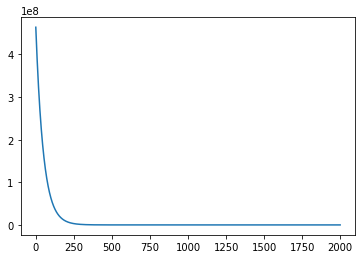

In [48]:
plt.plot(e)
plt.show()

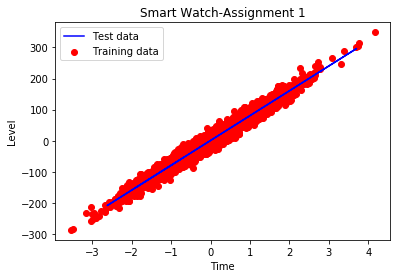

In [49]:
df_test=pd.read_csv('Linear_X_Test.csv')
test_x=df_test.values
test_x.reshape((-1,))
plt.scatter(x,y,color='red',label='Training data')
plt.plot(test_x,hypothesis(test_x,final),color='blue',label='Test data')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Level')
plt.title('Smart Watch-Assignment 1')
plt.show()

In [50]:
y_test=[]
for i in range(x.shape[0]):
    y_test.append(hypothesis(x[i],final))
print(float((y_test==y).sum()/y.shape[0]))

0.0


In [51]:
print(final)

[ 0.68386831 79.90573698]
